# Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LEAD.csv')
data.head()


,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
0,1,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,1,1,2,0,0
3,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,0


# Clean, Prepare and Manipulate the Data #

For getting an insight about the dataset, we can get a quick summary about the dataset using 'info' and 'describe()' function.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20742 entries, 0 to 20741
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OWN_HOUSE        20742 non-null  int64
 1   OWN_CAR          20742 non-null  int64
 2   HOUSE_LOAN       20742 non-null  int64
 3   CAR_LOAN         20742 non-null  int64
 4   SMOKER           20742 non-null  int64
 5   HEART_DISEASE    20742 non-null  int64
 6   DIABETES         20742 non-null  int64
 7   MARITAL_STATUS   20742 non-null  int64
 8   CHILDREN         20742 non-null  int64
 9   OTHER_INSURANCE  20742 non-null  int64
 10  PURCHASE         20742 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [4]:
data.describe()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
count,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000
mean,0.336033,0.166715,0.038521,0.037219,0.229968,0.034664,0.310722,0.955067,1.244673,0.280494,0.085768
std,0.472362,0.372730,0.192455,0.189303,0.420822,0.182932,0.462800,0.207162,0.696347,0.449251,0.280028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [5]:
data.PURCHASE.value_counts(normalize=True)

0    0.914232
1    0.085768
Name: PURCHASE, dtype: float64

Target column is imbalanced. Appx 92% times 0 and 8% times 1. Such kind of problem statements fall under imbalanced class classification problem.

Now, we need to check whether there is any missing value in the dataset or not. For that we will be using the following code.

In [6]:
data.isnull().sum(axis = 0)

OWN_HOUSE          0
OWN_CAR            0
HOUSE_LOAN         0
CAR_LOAN           0
SMOKER             0
HEART_DISEASE      0
DIABETES           0
MARITAL_STATUS     0
CHILDREN           0
OTHER_INSURANCE    0
PURCHASE           0
dtype: int64

Seperate features into X and target into y

In [7]:
X = np.array(data[['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE']])

y = np.array(data[['PURCHASE']])


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25, stratify = y)


 - If the Stratify argument is set to the class labels in the train_test_split, it will ensure that both the training and the test samples will have the same proportion of both the target classes
 - **With imbalanced classes, its recommended to created stratified random samples**

## Which type of Naive Bayes to apply ?

Since most of features in our dataset are binary hence we go for *Bernoulli Naive Bayes.*

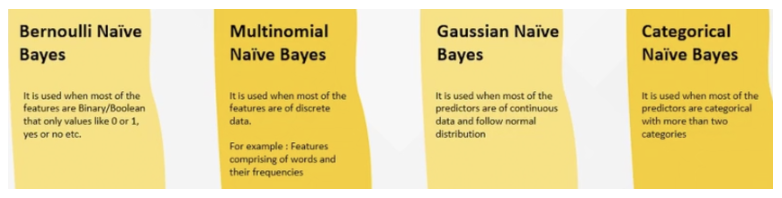

In [9]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


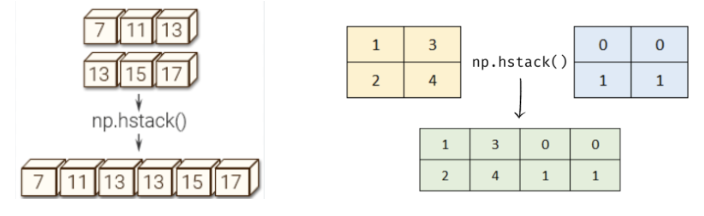

In [10]:
y_pred[0:2]

array([0, 0])

Below hstack X_test, y_test, y_pred

In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
X_test.shape

(3112, 10)

In [13]:
y_test.shape

(3112, 1)

In [14]:
y_pred.shape

(3112,)

In [15]:
y_pred = y_pred.reshape(-1,1)
y_pred.shape

(3112, 1)

In [16]:
test_pred = pd.DataFrame(np.hstack((X_test,y_test,y_pred)),columns=['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE','y_test','y_pred'])
test_pred.head()


,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,y_test,y_pred
0,1,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,2,1,0,0
4,0,0,0,0,1,0,0,1,2,0,0,0


In [17]:
test_pred[['y_test','y_pred']].head(10)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [18]:
#Total test observations
n=test_pred.shape[0]   # number of rows
n

3112

In [19]:
# accuracy of our model when tested on test dataset

(sum(test_pred.y_test == test_pred.y_pred)/n)*100

88.4318766066838

Importing classification metrics from scikit learn which includes accuracy_score, confusion_matrix, f1_score, roc_curve, auc.

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve,auc,roc_auc_score

print("accuracy Score=",accuracy_score(y_test,y_pred)*100)

accuracy Score= 88.4318766066838


In [21]:
cm = confusion_matrix(y_test,y_pred,labels=(0,1))
cm

array([[2690,  155],
       [ 205,   62]])

In [22]:
#Actually 0, but predicted as 0: TN
TN = cm[0,0]
print("True Negative: ",TN)

True Negative:  2690


In [23]:
#Actually 0, but predicted as 1 : FP
FP = cm[0,1]
print("False Positive: ",FP)

False Positive:  155


In [24]:
#Actually 1, but predicted as 0 : FN
FN = cm[1,0]
print("False Negative: ",FN)

False Negative:  205


In [25]:
#Actually 1, but predicted as 1 : TP
TP = cm[1,1]
print("True Positive: ",TP)

True Positive:  62


Plot confusion Matrix

In [26]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

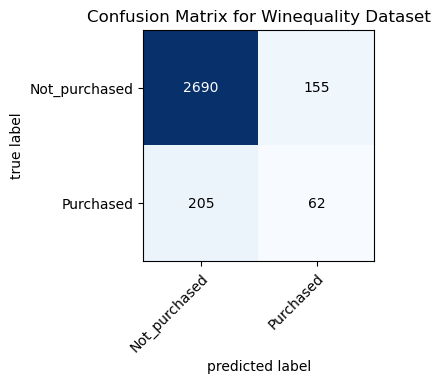

In [27]:
fig = plot_confusion_matrix(cm,class_names=['Not_purchased','Purchased'],figsize=(3,3))
plt.title("Confusion Matrix for Winequality Dataset")
plt.show()

### Accuracy

In [28]:
#Accuracy = Total Number of correct predictions/Total Number of observations
#orAccuracy = (TN+TP)/Total Number of observations
(TN+TP)/n

0.884318766066838

<font color=blue>*In TPR, TNR, FPR, FNR, denominator refers to actual values while Numerator refers to predicted values.*

### TPR/ Sensitivity / Recall
Out of all positive classes how many instances were predicted correctly.

*Recall measures the completeness of positive predictions made by a model. A high recall indicates that the model is identifying most of the positive instances in the dataset.*

In [29]:
# Recall or TPR or Sensitivity : TP/(TP+FN)
recall = TP/(TP+FN)
recall

0.23220973782771537

### TNR/ Specificity
Out of all negative classes how many instances were predicted correctly.

In [30]:
#Specificity : TN/(TN+FP)̉
specificity = TN/(TN+FP)
specificity

0.945518453427065

### FPR - False Positive rate

In [31]:
#FPR = 1-specificity or FP/(FP+TN)
FPR = 1-specificity
FPR

0.054481546572935025

### FNR - False Negative Rate

In [32]:
FNR = FN/(FN+TP)
FNR

0.7677902621722846

<font color=blue>*In Positive Predictive Value and Negative Predictive value, denominator & numerator both referring to predictions (from model).*

### Precision / Positive Predictive Value

*Precision measures the accuracy of positive predictions made by a model.A high precision indicates that the model is making very few false positive predictions.*

In [33]:
precision = TP/(TP+FP)
precision

0.2857142857142857

### Negative Predictive Value

In [34]:
TN/(TN+FN)

0.9291882556131261

### F1 Score

Manual Calculation

In [35]:
#F1_score is the harmonic mean between precision and recall
F1_score = (2*precision*recall)/(precision+recall)
F1_score

0.25619834710743805

Using scikit learn

In [36]:
f1_score(y_test,y_pred)

0.25619834710743805

### AUC

* <font color=blue> Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [37]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from
# prediction scores.   
# Input expected in this function is clf.predict_proba(X)[:, 1]

y_pred1 = nb.predict_proba(X_test)

auc1 = roc_auc_score(y_test, y_pred1[:, 1])

auc1

0.8463096437010854

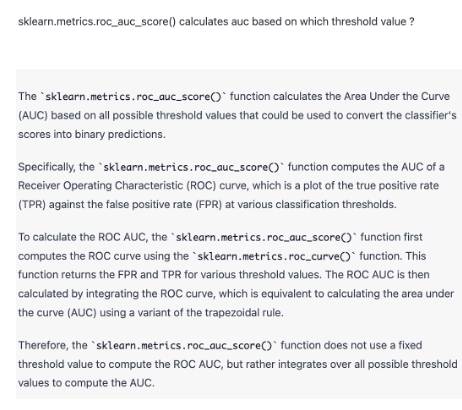

### ROC Curve - curve b/w fpr and tpr for various threshold values

In [38]:
probs = nb.predict_proba(X_test)

In [39]:
prob_positive = probs[:,1]

In [40]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [41]:
print(fpr.shape,tpr.shape, threshold.shape)

(116,) (116,) (116,)


In [42]:
df = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])


In [43]:
df.head()

,threshold,fpr,tpr
0,1.952811,0.000000,0.000000
1,0.952811,0.000351,0.007491
2,0.914452,0.002812,0.033708
3,0.895770,0.002812,0.037453
4,0.865842,0.003163,0.037453


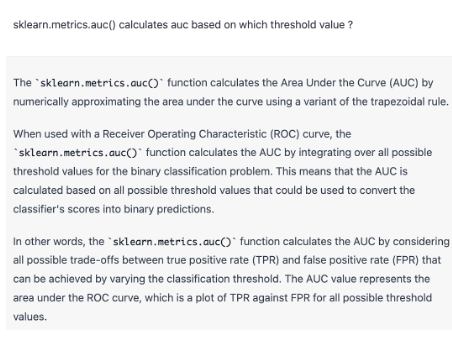

In [44]:
roc_auc_score = auc(fpr,tpr)
roc_auc_score

0.8463096437010854

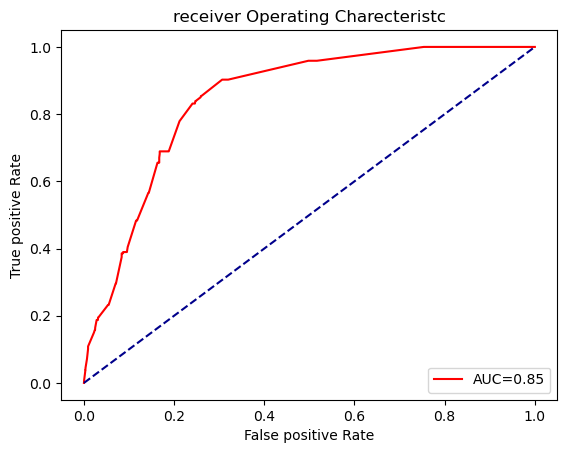

In [45]:
plt.title("receiver Operating Charecteristc")
plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc_auc_score)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
plt.ylabel('True positive Rate')
plt.xlabel('False positive Rate')
plt.show()

## **Note**

- Either you use **sklearn.metrics.roc_auc_score** or **sklearn.metrics.auc** to calculate the auc score. Both should give same answer as shown above. However the inputs are different for both.

- **sklearn.metrics.roc_auc_score will take input as ((y_test,prob_positive)**, internally first calculate the roc_curve and get fpr,tpr, thresholds. It will then calculate auc score by integrating roc curve which is equivalent to taking area under curve.It is important to note that sklearn.metrics.roc_auc_score will take only positive class probability using predict_proba as input, if we provide y_pred using predict function as input, it will give wrong result of auc score.

- **sklearn.metrics.auc will take fpr,tpr as input** which u need to expliciltly calculate by using roc_curve(y_test,prob_positive) function to get fpr,tpr, threshold as output.